In [1]:
pip install spotipy

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: six>=1.15.0 in c:\users\emank\anaconda3\lib\site-packages (from spotipy) (1.16.0)



In [191]:
#import spotify lite python library
import spotipy
import os
import pandas as pd
from sqlalchemy import text, create_engine, inspect

In [7]:
#import clientcredentials
from spotipy.oauth2 import SpotifyClientCredentials

In [10]:
CLIENT_ID = 'fcfed0dfae5145ac9d1aeb0cfe821986'
CLIENT_SECRET = '9cdc25ef0776492ab8ef33aef21d4bd9'

In [11]:
auth_manager = SpotifyClientCredentials(client_id = CLIENT_ID, client_secret=CLIENT_SECRET)
sp = spotipy.Spotify(auth_manager=auth_manager)

# Connect database

In [535]:
HOST = 'localhost'
USERNAME = 'postgres'
PASSWORD = 'postgres'
PORT = '5432'
DB = 'spotify'

conn_string = f'postgresql://{USERNAME}:{PASSWORD}@{HOST}:{PORT}/{DB}'
        
engine = create_engine(conn_string, echo=True, encoding='latin1')

# Create tables

#Create 3 tables 

```playlists ('id' text ,'name' text ,'description' text, 'uri' text )```

```songs ('id' text, 'title' text, 'link' text, 'popularity' int)```
```song features ('id' text, 'song_name' text,'danceability' float, 'energy' float, 'key' var, 'loudness' float,
 'mode' float, 'speechiness' float, 'acousticness' float, 'instrumentalness' float, 'liveness' float, 'valence' float,
'tempo' int, 'type' text, 'analysis_url' text, 'duration_ms' int, 'time_signature' int)```

In [226]:
playlist_table = '''
CREATE TABLE IF NOT EXISTS playlists (
    id varchar PRIMARY KEY,
    name TEXT,
    description TEXT,
    uri TEXT
)
'''

In [505]:
songs_table = '''
CREATE TABLE IF NOT EXISTS songs (
    track_id varchar PRIMARY KEY,
    title TEXT,
    artists TEXT,
    track_uri TEXT,
    popularity INT,
    playlist_id varchar
)
'''

In [246]:
features_table = '''
CREATE TABLE IF NOT EXISTS song_features (
    id varchar PRIMARY KEY,
    danceability FLOAT,
    energy FLOAT,
    key INT,
    loudness FLOAT,
    mode INT,
    speechiness FLOAT,
    acousticness FLOAT,
    instrumentalness INT,
    liveness FLOAT,
    valence FLOAT,
    tempo FLOAT,
    type TEXT,
    uri TEXT,
    track_href TEXT,
    analysis_url TEXT,
    duration_ms INT,
    time_signature INT
)
'''

### Create playlist table

In [227]:
engine.execute(playlist_table)

2022-04-04 09:51:21,028 INFO sqlalchemy.engine.Engine 
CREATE TABLE IF NOT EXISTS playlists (
    id varchar PRIMARY KEY,
    name TEXT,
    description TEXT,
    uri TEXT
)

2022-04-04 09:51:21,029 INFO sqlalchemy.engine.Engine [raw sql] {}
2022-04-04 09:51:21,037 INFO sqlalchemy.engine.Engine COMMIT


### Create songs table

In [536]:
engine.execute(songs_table)

2022-04-04 16:46:56,613 INFO sqlalchemy.engine.Engine select version()
2022-04-04 16:46:56,613 INFO sqlalchemy.engine.Engine [raw sql] {}
2022-04-04 16:46:56,614 INFO sqlalchemy.engine.Engine select current_schema()
2022-04-04 16:46:56,615 INFO sqlalchemy.engine.Engine [raw sql] {}
2022-04-04 16:46:56,616 INFO sqlalchemy.engine.Engine show standard_conforming_strings
2022-04-04 16:46:56,617 INFO sqlalchemy.engine.Engine [raw sql] {}
2022-04-04 16:46:56,618 INFO sqlalchemy.engine.Engine 
CREATE TABLE IF NOT EXISTS songs (
    track_id varchar PRIMARY KEY,
    title TEXT,
    artists TEXT,
    track_uri TEXT,
    popularity INT,
    playlist_id varchar
)

2022-04-04 16:46:56,618 INFO sqlalchemy.engine.Engine [raw sql] {}
2022-04-04 16:46:56,626 INFO sqlalchemy.engine.Engine COMMIT


### Create song features table

In [247]:
engine.execute(features_table)

2022-04-04 10:23:44,088 INFO sqlalchemy.engine.Engine 
CREATE TABLE IF NOT EXISTS song_features (
    id varchar PRIMARY KEY,
    danceability FLOAT,
    energy FLOAT,
    key INT,
    loudness FLOAT,
    mode INT,
    speechiness FLOAT,
    acousticness FLOAT,
    instrumentalness INT,
    liveness FLOAT,
    valence FLOAT,
    tempo FLOAT,
    type TEXT,
    uri TEXT,
    track_href TEXT,
    analysis_url TEXT,
    duration_ms INT,
    time_signature INT
)

2022-04-04 10:23:44,090 INFO sqlalchemy.engine.Engine [raw sql] {}
2022-04-04 10:23:44,097 INFO sqlalchemy.engine.Engine COMMIT


# Create playlist object

In [200]:
def search_genres(genres):
    for style in genres:
        categories = sp.category_playlists(style)
        
    return categories

In [201]:
genres = ['rnb']

In [215]:
def get_genres(country='US'):
    temp_list = sp.categories(country)
    genres = [i.get('id') for i in temp_list['categories']['items']]
    return genres

In [218]:
genres_list = get_genres()

# Create dataframe with playlist names and links

In [199]:
def get_playlists(playlist_obj):
    items = []
    
    cat_keys = ['id','name','description', 'uri']
    
    obj = playlist_obj['playlists']['items']
    for i in obj:
        playlist = [i[k] for k in cat_keys]
        items.append(playlist)
        
    df = pd.DataFrame(items, columns=cat_keys)
    return df

In [193]:
play_df = get_playlists(categories)

In [219]:
play_df.head()

,id,name,description,uri
0,37i9dQZF1DWYmmr74INQlb,I Love My '00s R&B,Check out these throwback R&B jams from the fi...,spotify:playlist:37i9dQZF1DWYmmr74INQlb
1,37i9dQZF1DWXbttAJcbphz,I Love My '10s R&B,The most essential R&B songs from the 2010s. C...,spotify:playlist:37i9dQZF1DWXbttAJcbphz
2,37i9dQZF1DX6VDO8a6cQME,I Love My '90s R&B,The '90s had an amazing soundtrack. Let's remi...,spotify:playlist:37i9dQZF1DX6VDO8a6cQME
3,37i9dQZF1DWXnexX7CktaI,Gold Edition,All the jams. Cover: Usher,spotify:playlist:37i9dQZF1DWXnexX7CktaI
4,37i9dQZF1DWUzFXarNiofw,New Jams,"The newest, freshest R&B tunes. Cover: Kehlani",spotify:playlist:37i9dQZF1DWUzFXarNiofw


In [229]:
#Adding dataframes to a list for easy recall
dataframes = ['play_df']


In [228]:
play_df.to_sql('playlists', engine, if_exists='append', index=False, method=)

2022-04-04 09:55:05,638 INFO sqlalchemy.engine.Engine select relname from pg_class c join pg_namespace n on n.oid=c.relnamespace where pg_catalog.pg_table_is_visible(c.oid) and relname=%(name)s
2022-04-04 09:55:05,639 INFO sqlalchemy.engine.Engine [generated in 0.00105s] {'name': 'playlists'}
2022-04-04 09:55:05,641 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2022-04-04 09:55:05,643 INFO sqlalchemy.engine.Engine INSERT INTO playlists (id, name, description, uri) VALUES (%(id)s, %(name)s, %(description)s, %(uri)s)
2022-04-04 09:55:05,643 INFO sqlalchemy.engine.Engine [generated in 0.00086s] ({'id': '37i9dQZF1DWYmmr74INQlb', 'name': "I Love My '00s R&B", 'description': 'Check out these throwback R&B jams from the first decade of the 21st century. Cover: Mary J Blige ', 'uri': 'spotify:playlist:37i9dQZF1DWYmmr74INQlb'}, {'id': '37i9dQZF1DWXbttAJcbphz', 'name': "I Love My '10s R&B", 'description': 'The most essential R&B songs from the 2010s. Cover: Beyonce', 'uri': 'spotify:playlist:37

# Function for sending dataframes to Postgres

In [351]:
def send_to_database(dataframe, engine, table_name, key_column='id', exists_method='append', index=False):
    """
    This function takes in a dataframe and passes it into the corresponding postgres table
    """
    
    dataframe = dataframe.drop_duplicates(subset=key_column)
    
    dataframe.to_sql(table_name, engine, if_exists=exists_method, index=index)
    

In [37]:
features_df.reindex(columns = ['song_name','danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature'])

,song_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,warm embrace,0.698,0.603,5,-6.508,0,0.1060,0.110,0,0.0786,0.910,86.998,audio_features,7rTzmiwE6lmBG8vQvBzNg7,spotify:track:7rTzmiwE6lmBG8vQvBzNg7,https://api.spotify.com/v1/tracks/7rTzmiwE6lmB...,https://api.spotify.com/v1/audio-analysis/7rTz...,234967,4
1,up at night,0.563,0.756,0,-3.852,0,0.0579,0.196,0,0.2450,0.234,100.012,audio_features,4WghJOMjDpGdlk3b8aJIgy,spotify:track:4WghJOMjDpGdlk3b8aJIgy,https://api.spotify.com/v1/tracks/4WghJOMjDpGd...,https://api.spotify.com/v1/audio-analysis/4Wgh...,182227,4
2,go get it,0.703,0.650,9,-6.818,1,0.0762,0.215,0,0.0579,0.645,119.960,audio_features,4Q1Fgnq4W4ER8CUe3fgqWd,spotify:track:4Q1Fgnq4W4ER8CUe3fgqWd,https://api.spotify.com/v1/tracks/4Q1Fgnq4W4ER...,https://api.spotify.com/v1/audio-analysis/4Q1F...,290064,4
3,stay,0.582,0.531,1,-8.726,1,0.0683,0.277,0,0.0638,0.784,139.840,audio_features,64lSCufIRJ1FlH0q4CwSUd,spotify:track:64lSCufIRJ1FlH0q4CwSUd,https://api.spotify.com/v1/tracks/64lSCufIRJ1F...,https://api.spotify.com/v1/audio-analysis/64lS...,192000,4
4,conversations,0.642,0.481,9,-11.462,0,0.0343,0.267,0,0.4650,0.860,71.032,audio_features,7MouZmAL2n18HGV4XhwN30,spotify:track:7MouZmAL2n18HGV4XhwN30,https://api.spotify.com/v1/tracks/7MouZmAL2n18...,https://api.spotify.com/v1/audio-analysis/7Mou...,169585,4


# Get Tracks

In [527]:
def get_track_attr(temp_idx):
    """
    Search through dictionary key values and return list of track attributes
    """
    keys = ['id', 'uri', 'name', 'artists', 'popularity']
    temp_list = []    
    for key in keys:
        if key == 'artists':
            temp_value = [temp_idx[key][i]['name'] for i in range(len(temp_idx[key]))]
            temp_value = ', '.join(temp_value)
        else:
            temp_value = temp_idx[key]
        temp_list.append(temp_value)
    return temp_list

In [510]:
def get_tracks(playlist_id):
    
    """
    This function takes in playlist_id. 
    
    outputs:
        track_id
        track_uri
        track_names
        track_popularity
        
    returns a dataframe from outputs
    """
    song_data = []
    
    p_items = sp.playlist_items(playlist_id)
    p_items = p_items['items']
    
    
    for i in range(len(p_items)):
        temp_idx = p_items[i]['track']
        song_list = get_track_attr(temp_idx) #FUNCTION
        song_list.append(playlist_id)
        song_data.append(song_list)
    
    columns = ['track_id','track_uri','title','artists','popularity','playlist_id']
    
    df_result =  pd.DataFrame(song_data, columns=columns)
    
    return df_result

In [511]:
def get_all_songs(playlist_id):
    temp_dataframes = []
    for row in play_df.iterrows():
        playlist_id = row[1]['id']
        temp_df = get_tracks(playlist_id) #FUNCTION to get tracks
        temp_dataframes.append(temp_df)
        
    songs_df = pd.concat(temp_dataframes)
    return songs_df

In [528]:
songs_df = get_all_songs(playlist_id)

In [529]:
songs_df

,track_id,track_uri,title,artists,popularity,playlist_id
0,6Y3WvyUG9iE5bQYg38SPtQ,spotify:track:6Y3WvyUG9iE5bQYg38SPtQ,Be Without You - Kendu Mix,Mary J. Blige,74,37i9dQZF1DWYmmr74INQlb
1,4iuNZTcvT9diFySSzVsnVS,spotify:track:4iuNZTcvT9diFySSzVsnVS,When I See U,Fantasia,75,37i9dQZF1DWYmmr74INQlb
2,0ceeRNqbOzRiGE42KWSrRa,spotify:track:0ceeRNqbOzRiGE42KWSrRa,Into You (feat. Fabolous),"Tamia, Fabolous",64,37i9dQZF1DWYmmr74INQlb
3,2RqZFOLOnzVmHUX7ZMcaES,spotify:track:2RqZFOLOnzVmHUX7ZMcaES,Let It Go,"Keyshia Cole, Missy Elliott, Lil' Kim",71,37i9dQZF1DWYmmr74INQlb
4,3aw9iWUQ3VrPQltgwvN9Xu,spotify:track:3aw9iWUQ3VrPQltgwvN9Xu,Family Affair,Mary J. Blige,82,37i9dQZF1DWYmmr74INQlb
...,...,...,...,...,...,...
45,1sVEcxx3au6WWt8WcQO4N9,spotify:track:1sVEcxx3au6WWt8WcQO4N9,Same Space? - Remix,"Tiana Major9, SiR",44,37i9dQZF1DXcSC8oOed07w
46,2Ee9amLUslOwgoJWZEpSSD,spotify:track:2Ee9amLUslOwgoJWZEpSSD,Mystery Lady (feat. Don Toliver),"Masego, Don Toliver",73,37i9dQZF1DXcSC8oOed07w
47,5Jg9DV3m2umJpoHXV2e6j8,spotify:track:5Jg9DV3m2umJpoHXV2e6j8,Dynamite.,"Gallant, Brandy",53,37i9dQZF1DXcSC8oOed07w
48,3T9VLKYbT0pGWPqhy415G0,spotify:track:3T9VLKYbT0pGWPqhy415G0,Guilty,"Sevyn Streeter, Chris Brown, A$AP Ferg",58,37i9dQZF1DXcSC8oOed07w


In [334]:
dataframes.append('songs_df')

# Send songs table to postgres

In [537]:
send_to_database(songs_df, engine,'songs', key_column='track_id')

2022-04-04 16:47:06,491 INFO sqlalchemy.engine.Engine select relname from pg_class c join pg_namespace n on n.oid=c.relnamespace where pg_catalog.pg_table_is_visible(c.oid) and relname=%(name)s
2022-04-04 16:47:06,492 INFO sqlalchemy.engine.Engine [generated in 0.00059s] {'name': 'songs'}
2022-04-04 16:47:06,494 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2022-04-04 16:47:06,498 INFO sqlalchemy.engine.Engine INSERT INTO songs (track_id, track_uri, title, artists, popularity, playlist_id) VALUES (%(track_id)s, %(track_uri)s, %(title)s, %(artists)s, %(popularity)s, %(playlist_id)s)
2022-04-04 16:47:06,499 INFO sqlalchemy.engine.Engine [generated in 0.00330s] ({'track_id': '6Y3WvyUG9iE5bQYg38SPtQ', 'track_uri': 'spotify:track:6Y3WvyUG9iE5bQYg38SPtQ', 'title': 'Be Without You - Kendu Mix', 'artists': 'Mary J. Blige', 'popularity': 74, 'playlist_id': '37i9dQZF1DWYmmr74INQlb'}, {'track_id': '4iuNZTcvT9diFySSzVsnVS', 'track_uri': 'spotify:track:4iuNZTcvT9diFySSzVsnVS', 'title': 'When I See

# Get song features and add to database

In [515]:
def get_features(track_id):
    """
    Call to spotipy method audio_features.
    
    returns spotipy object
    """
    
    song = sp.audio_features(track_id)
    
    return song[0]

In [516]:
def make_features_dataframe(dataframe):
    """
    Create dataframe of song features using track_id from songs dataframe
    returns new dataframe
    """
    temp_features_list = [i for i in dataframe.track_id.apply(get_features)]
    
    features_df = pd.DataFrame(temp_features_list)
    
    features_df.reindex(['id', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature'], axis=1)
    
    return features_df

In [358]:
features_df = make_features_dataframe(songs_df)


In [371]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      707 non-null    float64
 1   energy            707 non-null    float64
 2   key               707 non-null    int64  
 3   loudness          707 non-null    float64
 4   mode              707 non-null    int64  
 5   speechiness       707 non-null    float64
 6   acousticness      707 non-null    float64
 7   instrumentalness  707 non-null    float64
 8   liveness          707 non-null    float64
 9   valence           707 non-null    float64
 10  tempo             707 non-null    float64
 11  type              707 non-null    object 
 12  id                707 non-null    object 
 13  uri               707 non-null    object 
 14  track_href        707 non-null    object 
 15  analysis_url      707 non-null    object 
 16  duration_ms       707 non-null    int64  
 1

In [362]:
send_to_database(features_df, engine,'song_features', key_column='id')

2022-04-04 14:20:52,501 INFO sqlalchemy.engine.Engine select relname from pg_class c join pg_namespace n on n.oid=c.relnamespace where pg_catalog.pg_table_is_visible(c.oid) and relname=%(name)s
2022-04-04 14:20:52,501 INFO sqlalchemy.engine.Engine [cached since 8866s ago] {'name': 'song_features'}
2022-04-04 14:20:52,505 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2022-04-04 14:20:52,511 INFO sqlalchemy.engine.Engine INSERT INTO song_features (danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, type, id, uri, track_href, analysis_url, duration_ms, time_signature) VALUES (%(danceability)s, %(energy)s, %(key)s, %(loudness)s, %(mode)s, %(speechiness)s, %(acousticness)s, %(instrumentalness)s, %(liveness)s, %(valence)s, %(tempo)s, %(type)s, %(id)s, %(uri)s, %(track_href)s, %(analysis_url)s, %(duration_ms)s, %(time_signature)s)
2022-04-04 14:20:52,512 INFO sqlalchemy.engine.Engine [generated in 0.00426s] ({'danceability': 0.726

In [363]:
dataframes.append('features_df')

In [364]:
dataframes

['play_df', 'songs_df', 'features_df']

In [524]:
songs_df.shape, features_df.shape
songs_df.columns, features_df.columns

(Index(['track_uri', 'title', 'artists', 'popularity', 'playlist_id'], dtype='object'),
 Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
        'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
        'type', 'uri', 'track_href', 'analysis_url', 'duration_ms',
        'time_signature'],
       dtype='object'))

In [522]:
songs_df.set_index('track_id', inplace=True)

In [387]:

features_df.set_index('id', inplace=True)

In [525]:
songs_df

,track_uri,title,artists,popularity,playlist_id
track_id,,,,,
6Y3WvyUG9iE5bQYg38SPtQ,spotify:track:6Y3WvyUG9iE5bQYg38SPtQ,Be Without You - Kendu Mix,[Mary J. Blige],74,37i9dQZF1DWYmmr74INQlb
4iuNZTcvT9diFySSzVsnVS,spotify:track:4iuNZTcvT9diFySSzVsnVS,When I See U,[Fantasia],75,37i9dQZF1DWYmmr74INQlb
0ceeRNqbOzRiGE42KWSrRa,spotify:track:0ceeRNqbOzRiGE42KWSrRa,Into You (feat. Fabolous),"[Tamia, Fabolous]",64,37i9dQZF1DWYmmr74INQlb
2RqZFOLOnzVmHUX7ZMcaES,spotify:track:2RqZFOLOnzVmHUX7ZMcaES,Let It Go,"[Keyshia Cole, Missy Elliott, Lil' Kim]",71,37i9dQZF1DWYmmr74INQlb
3aw9iWUQ3VrPQltgwvN9Xu,spotify:track:3aw9iWUQ3VrPQltgwvN9Xu,Family Affair,[Mary J. Blige],82,37i9dQZF1DWYmmr74INQlb
...,...,...,...,...,...
1sVEcxx3au6WWt8WcQO4N9,spotify:track:1sVEcxx3au6WWt8WcQO4N9,Same Space? - Remix,"[Tiana Major9, SiR]",44,37i9dQZF1DXcSC8oOed07w
2Ee9amLUslOwgoJWZEpSSD,spotify:track:2Ee9amLUslOwgoJWZEpSSD,Mystery Lady (feat. Don Toliver),"[Masego, Don Toliver]",73,37i9dQZF1DXcSC8oOed07w
5Jg9DV3m2umJpoHXV2e6j8,spotify:track:5Jg9DV3m2umJpoHXV2e6j8,Dynamite.,"[Gallant, Brandy]",53,37i9dQZF1DXcSC8oOed07w


In [519]:
complete_df = songs_df.merge(features_df, left_on=songs_df.index, right_on=features_df.index)

ValueError: You are trying to merge on int64 and object columns. If you wish to proceed you should use pd.concat

In [395]:
complete_df = complete_df.drop_duplicates().

In [518]:
complete_df

,key_0,track_uri,title,popularity,playlist_id,danceability,energy,key,loudness,mode,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,6Y3WvyUG9iE5bQYg38SPtQ,spotify:track:6Y3WvyUG9iE5bQYg38SPtQ,Be Without You - Kendu Mix,74,37i9dQZF1DWYmmr74INQlb,0.726,0.700,2,-5.881,0,...,0.000000,0.2620,0.673,146.559,audio_features,spotify:track:6Y3WvyUG9iE5bQYg38SPtQ,https://api.spotify.com/v1/tracks/6Y3WvyUG9iE5...,https://api.spotify.com/v1/audio-analysis/6Y3W...,246333,4
1,4iuNZTcvT9diFySSzVsnVS,spotify:track:4iuNZTcvT9diFySSzVsnVS,When I See U,75,37i9dQZF1DWYmmr74INQlb,0.569,0.596,8,-6.486,1,...,0.000079,0.2050,0.754,93.135,audio_features,spotify:track:4iuNZTcvT9diFySSzVsnVS,https://api.spotify.com/v1/tracks/4iuNZTcvT9di...,https://api.spotify.com/v1/audio-analysis/4iuN...,217347,4
3,4iuNZTcvT9diFySSzVsnVS,spotify:track:4iuNZTcvT9diFySSzVsnVS,When I See U,75,37i9dQZF1DWXnexX7CktaI,0.569,0.596,8,-6.486,1,...,0.000079,0.2050,0.754,93.135,audio_features,spotify:track:4iuNZTcvT9diFySSzVsnVS,https://api.spotify.com/v1/tracks/4iuNZTcvT9di...,https://api.spotify.com/v1/audio-analysis/4iuN...,217347,4
5,0ceeRNqbOzRiGE42KWSrRa,spotify:track:0ceeRNqbOzRiGE42KWSrRa,Into You (feat. Fabolous),64,37i9dQZF1DWYmmr74INQlb,0.677,0.531,7,-7.683,0,...,0.000000,0.1730,0.570,91.104,audio_features,spotify:track:0ceeRNqbOzRiGE42KWSrRa,https://api.spotify.com/v1/tracks/0ceeRNqbOzRi...,https://api.spotify.com/v1/audio-analysis/0cee...,294093,4
6,2RqZFOLOnzVmHUX7ZMcaES,spotify:track:2RqZFOLOnzVmHUX7ZMcaES,Let It Go,71,37i9dQZF1DWYmmr74INQlb,0.806,0.721,10,-5.167,0,...,0.000000,0.2090,0.781,94.967,audio_features,spotify:track:2RqZFOLOnzVmHUX7ZMcaES,https://api.spotify.com/v1/tracks/2RqZFOLOnzVm...,https://api.spotify.com/v1/audio-analysis/2RqZ...,238333,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,6RBfz4bNLNzvt37HycN1Xf,spotify:track:6RBfz4bNLNzvt37HycN1Xf,Present,70,37i9dQZF1DXcSC8oOed07w,0.684,0.514,1,-8.584,1,...,0.000000,0.1930,0.202,88.014,audio_features,spotify:track:6RBfz4bNLNzvt37HycN1Xf,https://api.spotify.com/v1/tracks/6RBfz4bNLNzv...,https://api.spotify.com/v1/audio-analysis/6RBf...,156376,4
821,1sVEcxx3au6WWt8WcQO4N9,spotify:track:1sVEcxx3au6WWt8WcQO4N9,Same Space? - Remix,44,37i9dQZF1DXcSC8oOed07w,0.545,0.387,4,-8.558,1,...,0.000000,0.0974,0.409,67.829,audio_features,spotify:track:1sVEcxx3au6WWt8WcQO4N9,https://api.spotify.com/v1/tracks/1sVEcxx3au6W...,https://api.spotify.com/v1/audio-analysis/1sVE...,248413,1
822,2Ee9amLUslOwgoJWZEpSSD,spotify:track:2Ee9amLUslOwgoJWZEpSSD,Mystery Lady (feat. Don Toliver),73,37i9dQZF1DXcSC8oOed07w,0.747,0.494,3,-7.957,0,...,0.000000,0.0982,0.624,76.006,audio_features,spotify:track:2Ee9amLUslOwgoJWZEpSSD,https://api.spotify.com/v1/tracks/2Ee9amLUslOw...,https://api.spotify.com/v1/audio-analysis/2Ee9...,228453,4
823,5Jg9DV3m2umJpoHXV2e6j8,spotify:track:5Jg9DV3m2umJpoHXV2e6j8,Dynamite.,53,37i9dQZF1DXcSC8oOed07w,0.358,0.356,8,-7.477,0,...,0.000000,0.1960,0.231,81.154,audio_features,spotify:track:5Jg9DV3m2umJpoHXV2e6j8,https://api.spotify.com/v1/tracks/5Jg9DV3m2umJ...,https://api.spotify.com/v1/audio-analysis/5Jg9...,211347,4


In [398]:
corr_df = complete_df.corr()

In [400]:
corr_df.style.highlight_max(color='red', axis=0)

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
popularity,1.000000,-0.107015,-0.082642,-0.066584,0.129858,-0.027297,-0.038430,0.027372,-0.093013,-0.030332,-0.128977,0.039199,-0.177579,-0.026739
danceability,-0.107015,1.000000,0.167351,0.013740,-0.026046,0.042813,-0.023160,-0.349834,0.034541,-0.084993,0.470440,-0.090392,0.084112,0.142114
energy,-0.082642,0.167351,1.000000,0.082649,0.462194,0.049313,0.058400,-0.426051,0.069773,0.101716,0.404066,-0.009486,0.158666,0.153663
key,-0.066584,0.013740,0.082649,1.000000,-0.015296,-0.184645,0.011463,0.051671,-0.017285,-0.071033,0.065773,-0.029839,0.072955,-0.023909
loudness,0.129858,-0.026046,0.462194,-0.015296,1.000000,-0.053089,0.132827,-0.167359,-0.138531,0.035104,-0.052501,-0.049882,-0.235243,0.084762
mode,-0.027297,0.042813,0.049313,-0.184645,-0.053089,1.000000,-0.010476,-0.026890,0.075884,0.107680,0.045745,0.008042,0.059092,-0.038090
speechiness,-0.038430,-0.023160,0.058400,0.011463,0.132827,-0.010476,1.000000,0.065316,-0.113710,0.106523,-0.060968,0.071232,-0.177947,-0.058272
acousticness,0.027372,-0.349834,-0.426051,0.051671,-0.167359,-0.026890,0.065316,1.000000,-0.003097,0.007742,-0.241371,-0.002725,-0.160916,-0.124906
instrumentalness,-0.093013,0.034541,0.069773,-0.017285,-0.138531,0.075884,-0.113710,-0.003097,1.000000,-0.030497,0.087490,0.012166,0.123024,0.026564
liveness,-0.030332,-0.084993,0.101716,-0.071033,0.035104,0.107680,0.106523,0.007742,-0.030497,1.000000,-0.040031,0.025181,0.010390,-0.019144


In [407]:
from matplotlib.pyplot import plot as plt
import seaborn as sns

<AxesSubplot:>

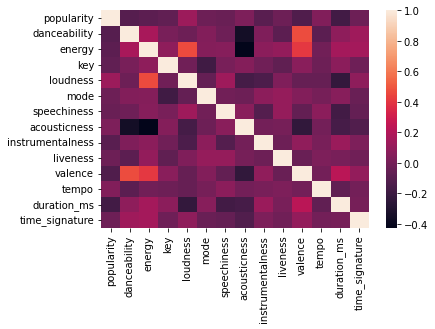

In [408]:
sns.heatmap(corr_df)

<AxesSubplot:xlabel='popularity', ylabel='duration_ms'>

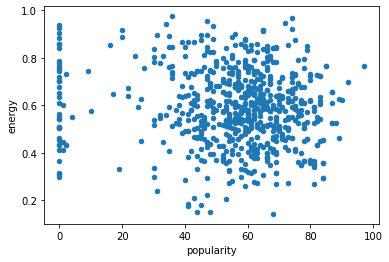

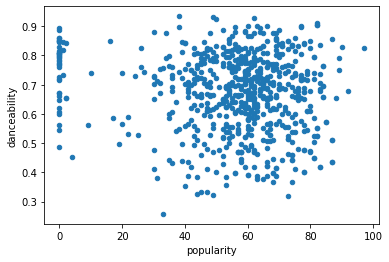

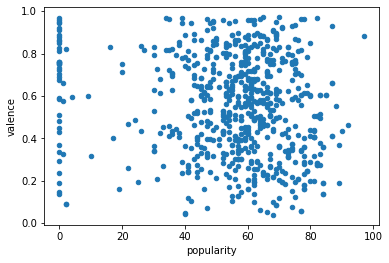

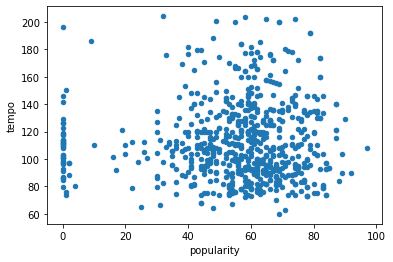

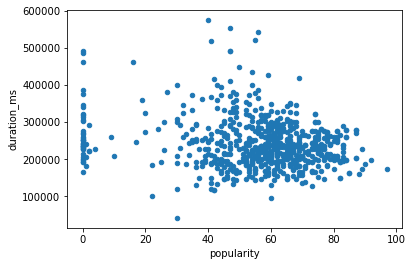

In [396]:
complete_df.plot(x='popularity',y='energy', kind='scatter')
complete_df.plot(x='popularity',y='danceability', kind='scatter')
complete_df.plot(x='popularity',y='valence', kind='scatter')
complete_df.plot(x='popularity',y='tempo', kind='scatter')
complete_df.plot(x='popularity',y='duration_ms', kind='scatter')

In [15]:
song_analysis = sp.audio_analysis('https://open.spotify.com/track/7MouZmAL2n18HGV4XhwN30?si=cd17c4597f8149c2')